In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Which music styles are present in the collection? Plot distribution. 
- - As the model predictions are activations, you need to decide what you consider as the final music style prediction for a track. If you want to consider the possibility of multiple styles per track, define some threshold for activation values. Otherwise, if you want to have a single music style per track, use the one with the maximum activation.
- - We have 400 values which may be a challenge to fit in a compact plot. Predicted styles have a parent broad genre category (all style tags have a format `genre—style`). Therefore you can instead report distribution for parent broad genres. In any case, also provide full results as a separate TSV file (similar to how we report genre distribution in MTG-Jamendo).


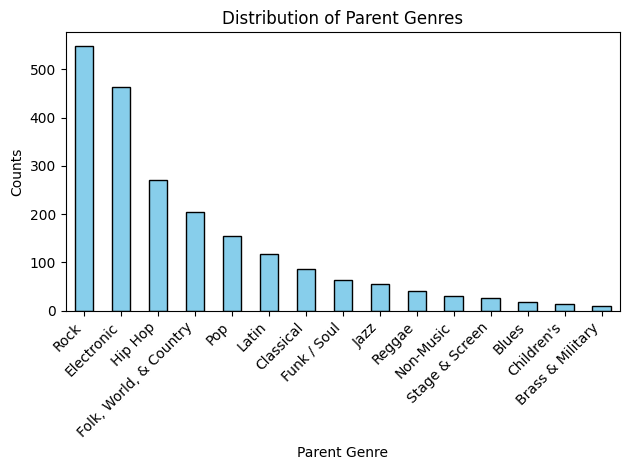

Counts of parent genres:
Rock                      549
Electronic                463
Hip Hop                   271
Folk, World, & Country    204
Pop                       155
Latin                     117
Classical                  86
Funk / Soul                64
Jazz                       56
Reggae                     40
Non-Music                  30
Stage & Screen             26
Blues                      17
Children's                 13
Brass & Military            9
Name: count, dtype: int64


In [3]:
genre_data = pd.read_pickle("descriptors/400-genre-activations.pkl")
discogs_df = pd.DataFrame(genre_data)


# Find column name with max value in each row
# discard last column as it contains filepath
max_column_per_row = discogs_df.loc[:, discogs_df.columns[:-1]].idxmax(axis='columns')

# Create a DataFrame with the counts and column name
distribution_counts_df = pd.DataFrame({'Genre': max_column_per_row.value_counts().index, 'Count': max_column_per_row.value_counts().values})

# Save the DataFrame to a TSV file with column names
distribution_counts_df.to_csv('metadata/genre-distribution_counts.tsv', sep='\t', index=False)

# Counting only parent genre divided by "--"
parent_genre_counts = max_column_per_row.apply(lambda x: x.split('---')[0]).value_counts()

# Plot the bar chart
ax = parent_genre_counts.plot(kind="bar", color='skyblue', edgecolor='black')

# Set labels and title
ax.set_xlabel('Parent Genre')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Parent Genres')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Counts of parent genres:")
print(parent_genre_counts)



In [4]:
descr_data = pd.read_pickle("descriptors/descriptors-but-genre-v4.pkl")
descriptors_df = pd.DataFrame(descr_data)

descriptors_df.head(10)

,file_path,loudness,tempo,voice_instrumental,danceability,valence_arousal,keyscale_edma,keyscale_krumhansl,keyscale_temperly
0,audio/audio.002/7D/7DyRfspnGYcUhCAMcCys2g.mp3,-8.753432,151,0.152532,0.991784,"(5.47484827041626, 5.619569301605225)","(B, minor, 0.9420120120048523)","(B, minor, 0.8466862440109253)","(B, minor, 0.7453948259353638)"
1,audio/audio.002/1p/1pCHi3zHca7jgR27Sfu7L8.mp3,-7.172849,120,0.183017,0.417037,"(4.977231025695801, 5.848262310028076)","(C, major, 0.9051561951637268)","(C, major, 0.8533162474632263)","(C, major, 0.7018154859542847)"
2,audio/audio.002/6o/6oOqQg46N239sc5Ev3THOa.mp3,-14.508702,87,0.007020,0.999970,"(5.468522071838379, 5.029833793640137)","(F, minor, 0.9200491905212402)","(F, minor, 0.7880072593688965)","(F, minor, 0.59732985496521)"
3,audio/audio.002/0V/0VjJm2ufYkgLgoPhJriQe7.mp3,-15.327171,96,0.345578,0.552027,"(4.859508037567139, 4.811494827270508)","(C, minor, 0.7964431047439575)","(C, minor, 0.7953463792800903)","(Eb, major, 0.827164351940155)"
4,audio/audio.002/2J/2JWEsdT3tEsebXCBVfXNZB.mp3,-9.145512,96,0.024057,0.044788,"(5.331084728240967, 5.79698371887207)","(C, major, 0.7605393528938293)","(C, major, 0.8524655699729919)","(C, major, 0.8561387658119202)"
5,audio/audio.002/2J/2J6epdgdPAHT7vRLk4Rk9c.mp3,-5.784881,118,0.039756,0.915503,"(5.564263820648193, 7.062124252319336)","(E, major, 0.8954668045043945)","(E, major, 0.923820972442627)","(E, major, 0.9024100303649902)"
6,audio/audio.002/4V/4VRDAU99gdEqcvxigIsZk7.mp3,-10.102044,116,0.534046,0.135723,"(5.974060535430908, 6.215495586395264)","(D, major, 0.8771098256111145)","(G, major, 0.8528109788894653)","(G, major, 0.8516694903373718)"
7,audio/audio.002/4V/4V09NGljfktzeKlOvE8Xh6.mp3,-5.806773,129,0.094355,0.911104,"(6.10237979888916, 7.003244400024414)","(Bb, major, 0.7960542440414429)","(Bb, major, 0.7417623996734619)","(Bb, major, 0.6293080449104309)"
8,audio/audio.002/4N/4NK2WRvmdwklhIbF7sjipX.mp3,-9.750427,95,0.446483,0.038725,"(4.84771203994751, 4.147519111633301)","(Eb, major, 0.8652084469795227)","(Eb, major, 0.9360600113868713)","(Eb, major, 0.9710869789123535)"
9,audio/audio.002/4N/4N29GJwuoR54lWu2svimOP.mp3,-9.072465,139,0.000789,0.169155,"(4.887794494628906, 5.452831745147705)","(D, major, 0.8355523943901062)","(D, major, 0.877406895160675)","(D, major, 0.8303760886192322)"


- How fast and danceable is the music? Plot tempo and danceability distribution.


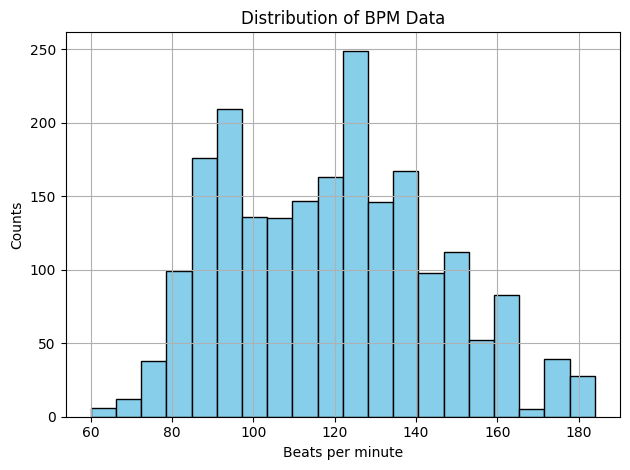

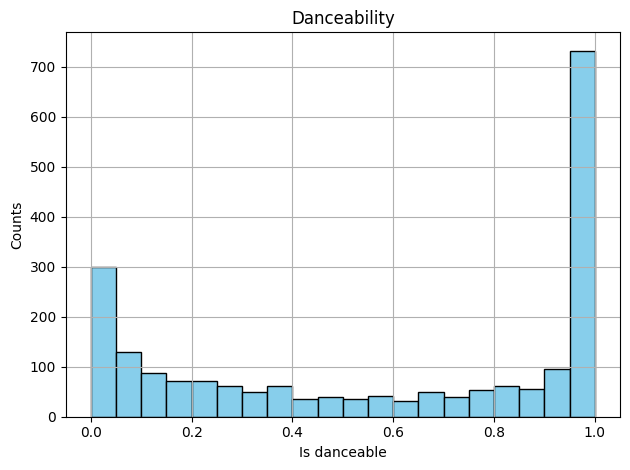

In [5]:

plt.hist(descriptors_df['tempo'], color='skyblue', edgecolor='black', bins=20)
plt.title('Distribution of BPM Data')
plt.xlabel('Beats per minute')
plt.ylabel('Counts')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.hist(descriptors_df['danceability'], color='skyblue', edgecolor='black', bins=20)
plt.title('Danceability')
plt.xlabel('Is danceable')
plt.ylabel('Counts')
plt.grid(True)
plt.tight_layout()
plt.show()

- How is music represented in terms of arousal/valence emotion space? Plot a 2D distribution.


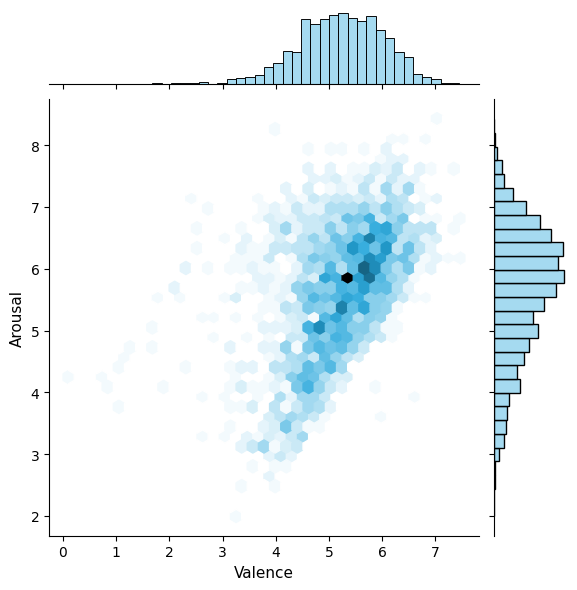

In [6]:
arousal = descriptors_df['valence_arousal'].apply(lambda x: x[0])
valence = descriptors_df['valence_arousal'].apply(lambda x: x[1])
joint_plot = sns.jointplot(x=arousal, y=valence, kind='hex', color='skyblue')
joint_plot.set_axis_labels('Valence', 'Arousal', fontsize=11)
plt.show()

- What about loudness? Plot integrated loudness LUFS distribution.


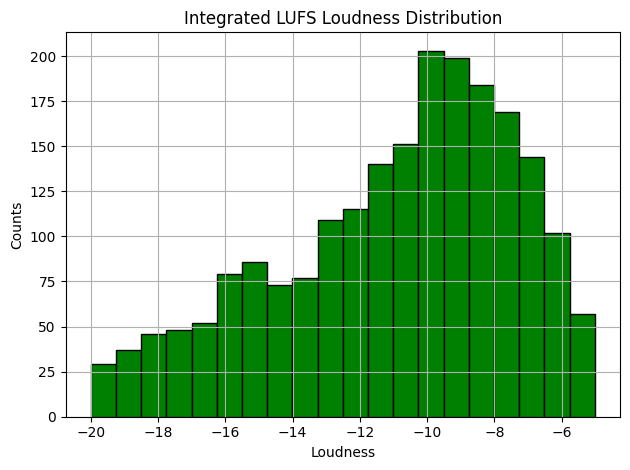

In [7]:
plt.hist(descriptors_df['loudness'], color='green', edgecolor='black', bins=20)
plt.title('Integrated LUFS Loudness Distribution')
plt.xlabel('Loudness')
plt.ylabel('Counts')
plt.grid(True)
plt.tight_layout()
plt.show()

- Which keys/scales are used in the collection? Plot distribution according to the three profiles we used.


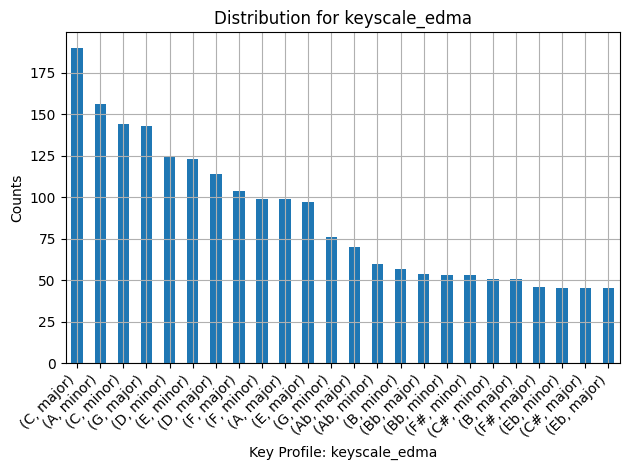

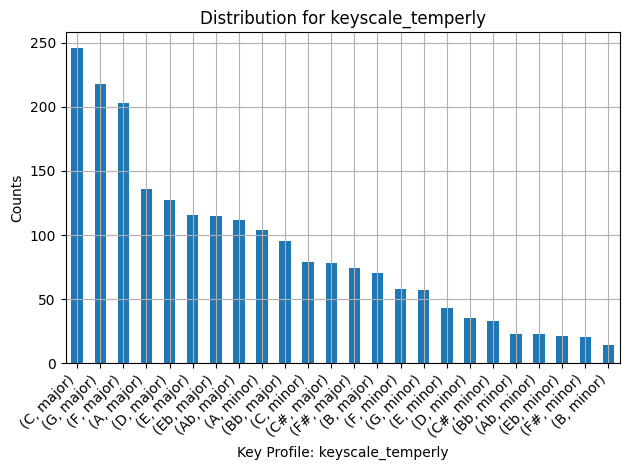

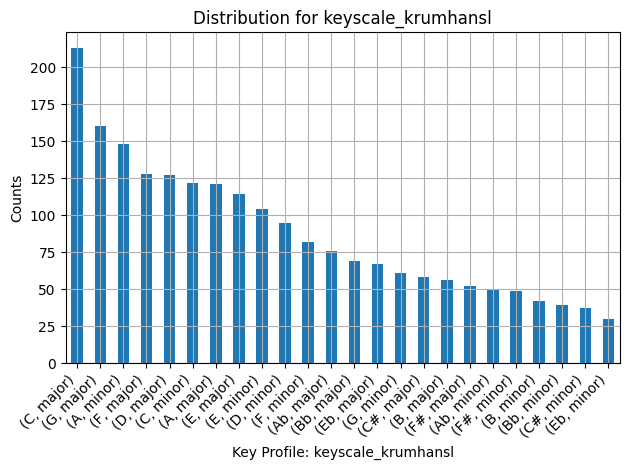

In [8]:
profiles = ["keyscale_edma", "keyscale_temperly", "keyscale_krumhansl"]

for key_profile in profiles:
    profile_counts = descriptors_df[key_profile].apply(lambda x: (x[0],x[1]) ).value_counts()

    profile_counts.plot(kind='bar')
    plt.xlabel(f'Key Profile: {key_profile}')
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)  
    plt.title(f'Distribution for {key_profile}')
    plt.tight_layout()  # Ensures all elements are properly spaced
    plt.show()


- How much of the music is vocal vs instrumental? 


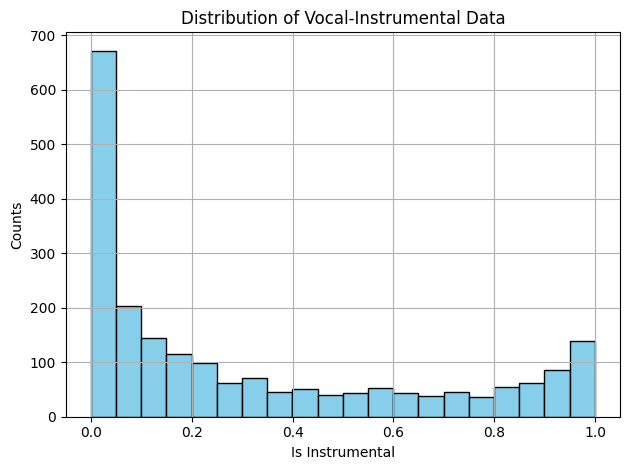

In [9]:

plt.hist(descriptors_df['voice_instrumental'], color='skyblue', edgecolor='black', bins=20)
plt.title('Distribution of Vocal-Instrumental Data')
plt.xlabel('Is Instrumental')
plt.ylabel('Counts')
plt.grid(True)
plt.tight_layout()
plt.show()
